In [343]:
import nltk

import matplotlib.pyplot as plt
import numpy as np

from gensim.models import Word2Vec
from mpl_toolkits.mplot3d import Axes3D
from nltk import FreqDist

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

%matplotlib inline

In [344]:
import dataloader
import textprocessor

In [345]:
stopwords = dataloader.load_stopwords("data/stopwords")
len(stopwords)

558

In [336]:
documents = dataloader.load_data("data/posts/*")
len(documents)

46

In [337]:
documents = textprocessor.process_documents(documents)
len(documents)

46

In [338]:
# tokenize
tokens = [nltk.word_tokenize(doc) for doc in documents]

# tokenize -> preprocess
#tokens = [textprocessor.remove_stopwords(nltk.word_tokenize(doc), stopwords) for doc in documents]
tokens = [ list(filter(lambda t : t=='i' or len(t)>1, token_list))  for token_list in tokens ]
list(map(lambda x : len(x), tokens))

[575,
 468,
 255,
 304,
 249,
 541,
 214,
 781,
 1059,
 401,
 1109,
 620,
 895,
 953,
 781,
 1191,
 393,
 610,
 538,
 1029,
 1371,
 529,
 670,
 41,
 148,
 475,
 247,
 171,
 443,
 514,
 429,
 205,
 389,
 920,
 1638,
 592,
 84,
 335,
 156,
 287,
 484,
 295,
 177,
 1224,
 628,
 300]

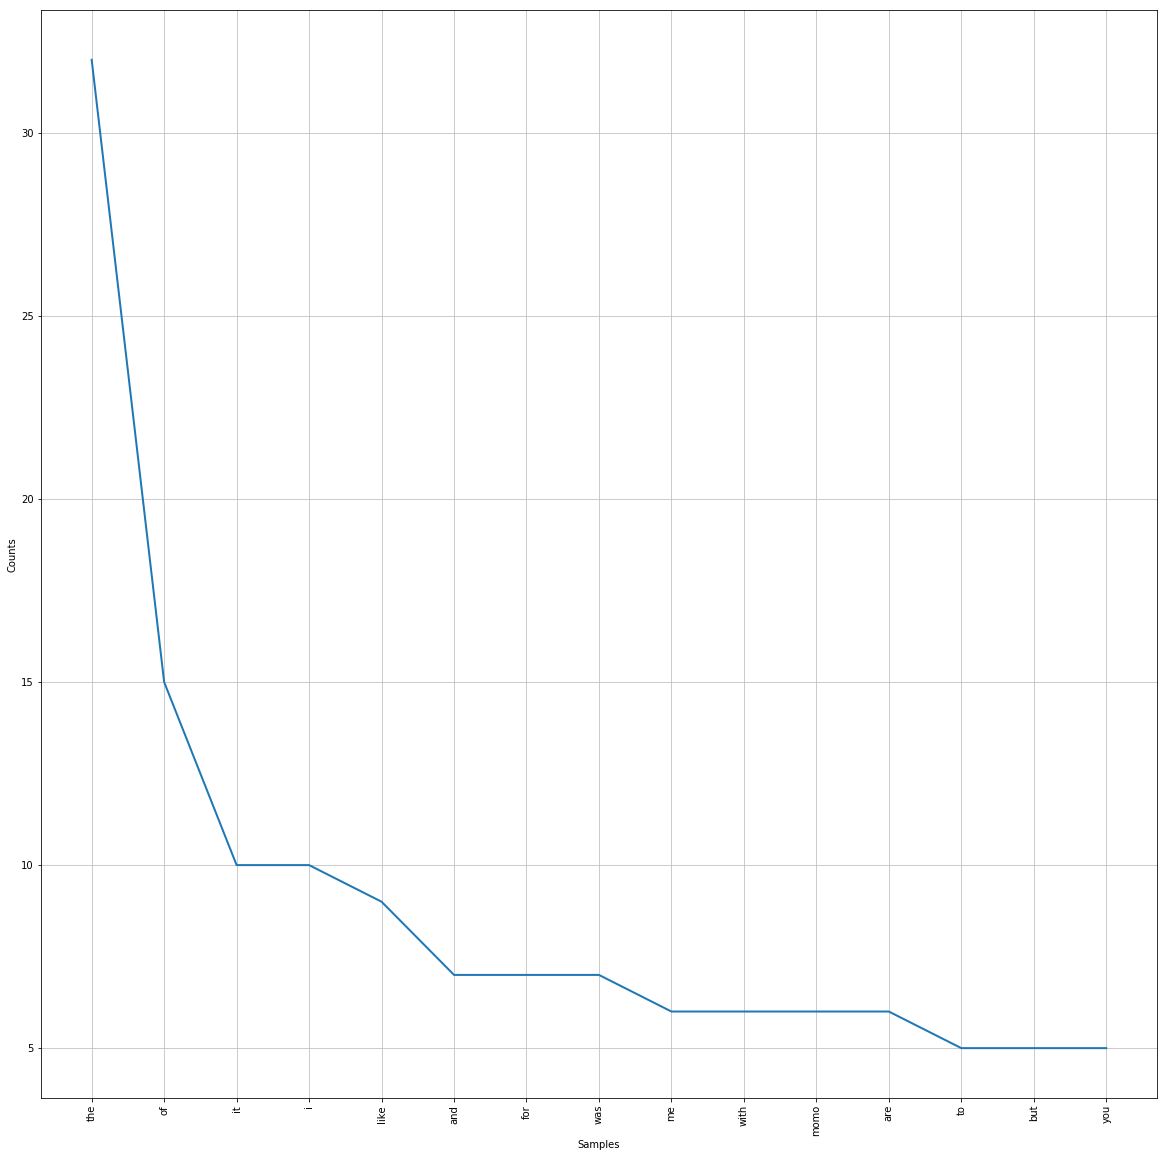

In [339]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 20
freq = FreqDist(tokens[1])
freq.plot(15, cumulative=False)

In [340]:
# train model
model = Word2Vec(tokens, min_count=1, size=75, sg=1, window=5)
print(model)

# access vocabulary
vocabs = list(model.wv.vocab)
len(vocabs)

Word2Vec(vocab=4674, size=75, alpha=0.025)


4674

In [341]:
# access vector
print(model['paradox'])

[-0.2635503   0.074007    0.13507715  0.0330735   0.15798213 -0.3269563
  0.22327128  0.3673582   0.16454585 -0.1283211  -0.26598957 -0.26130363
 -0.23617099 -0.00131118 -0.60558224 -0.40904152 -0.07559865 -0.02195972
  0.26133683  0.3387578  -0.16871811 -0.5255295   0.0907376  -0.17152475
 -0.13237101 -0.2387182   0.03590564 -0.08514694  0.10540764  0.03584346
 -0.23626623 -0.20316108 -0.07780717  0.35046875 -0.14821807 -0.1236122
 -0.04982552 -0.07437866 -0.12171351  0.11629264 -0.0013252  -0.12052666
  0.41892773 -0.0202754   0.2958456  -0.16683014  0.05496547  0.27062094
  0.17340824  0.18146138 -0.18592331 -0.00471508 -0.0465095  -0.23370537
  0.36925572  0.28164947  0.16401522 -0.1174119  -0.01355121 -0.17203438
 -0.09727394  0.06377297  0.2428093  -0.01936789  0.19893478  0.48572758
  0.13778254 -0.0917359   0.08126975 -0.14183238 -0.25810954 -0.33511034
  0.19700511  0.07127129  0.34873578]


/home/paradox/anaconda3/envs/machine-learning/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [342]:
# save model
model.save('data/nishparadox.bin')

KeyboardInterrupt: 

In [ ]:
model.wv.vocab['i'].count

In [ ]:
# remove stopwords
vocabs_filtered = textprocessor.remove_stopwords(vocabs, stopwords)
# remove single character
vocabs_filtered = list(filter(lambda s : len(s)>1, vocabs_filtered))
len(vocabs_filtered)

In [ ]:
# get sorted vocab with count
vocab_counts = sorted([ (v, model.wv.vocab[v].count) for v in vocabs_filtered ], key = lambda x : x[1], reverse=True)
vocab_counts[:10]

In [ ]:
# get top n words
n = 150
words, counts = zip(*vocab_counts)
vocabs_topn = words[:n]
vocabs_topn[:10]

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 20, 30
# get vectors
vectors = model[vocabs_topn]
#print(vectors)
X = vectors[:, 0]
Y = vectors[:, 1]
Z = vectors[:, 2]
#plt.scatter(X, Y)

# plot
fig, ax = plt.subplots()
ax.scatter(X, Y, s=150)

for i, txt in enumerate(vocabs_topn[:]):
    ax.annotate(txt, (X[i],Y[i]), color='red', size='15')
    #ax.text(Xp[i], Yp[i], Zp[i], txt, color='red')
plt.show()

In [ ]:
%matplotlib qt
plt.rcParams['figure.figsize'] = 20, 20
# plotj
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.scatter(X, Y, Z, c='skyblue', s=150)

for i, txt in enumerate(vocabs_topn):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    ax.text(X[i], Y[i], Z[i], txt, color='red')
plt.show()

In [ ]:
# get most similar
model.most_similar(positive=['mind'])

In [ ]:
res = model['life'] - model['coffee']
np.dot(res, model['death'])/(np.linalg.norm(res) * np.linalg.norm(model['death']))

### Principal Component Analysis
Let's project nd vector to lower dimension using PCA

In [ ]:
pca2d = PCA(n_components=2)
comp2d = pca2d.fit_transform(vectors)
print(comp2d.shape)

pca3d = PCA(n_components=3)
comp3d = pca3d.fit_transform(vectors)
comp3d.shape

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 25, 20

# visualize in 2d space
#print(vectors)
Xp = comp2d[:, 0]
Yp = comp2d[:, 1]
#plt.scatter(Xp, Yp)

# plot
fig, ax = plt.subplots()
#ax = Axes3D(fig)
ax.scatter(Xp, Yp, s=150)

#indices = range(0, 20)
#for i, txt in enumerate(vocabs_topn):
for i in range(0, 75):
    ax.annotate(vocabs_topn[i], (Xp[i],Yp[i]), color='red', size=20)

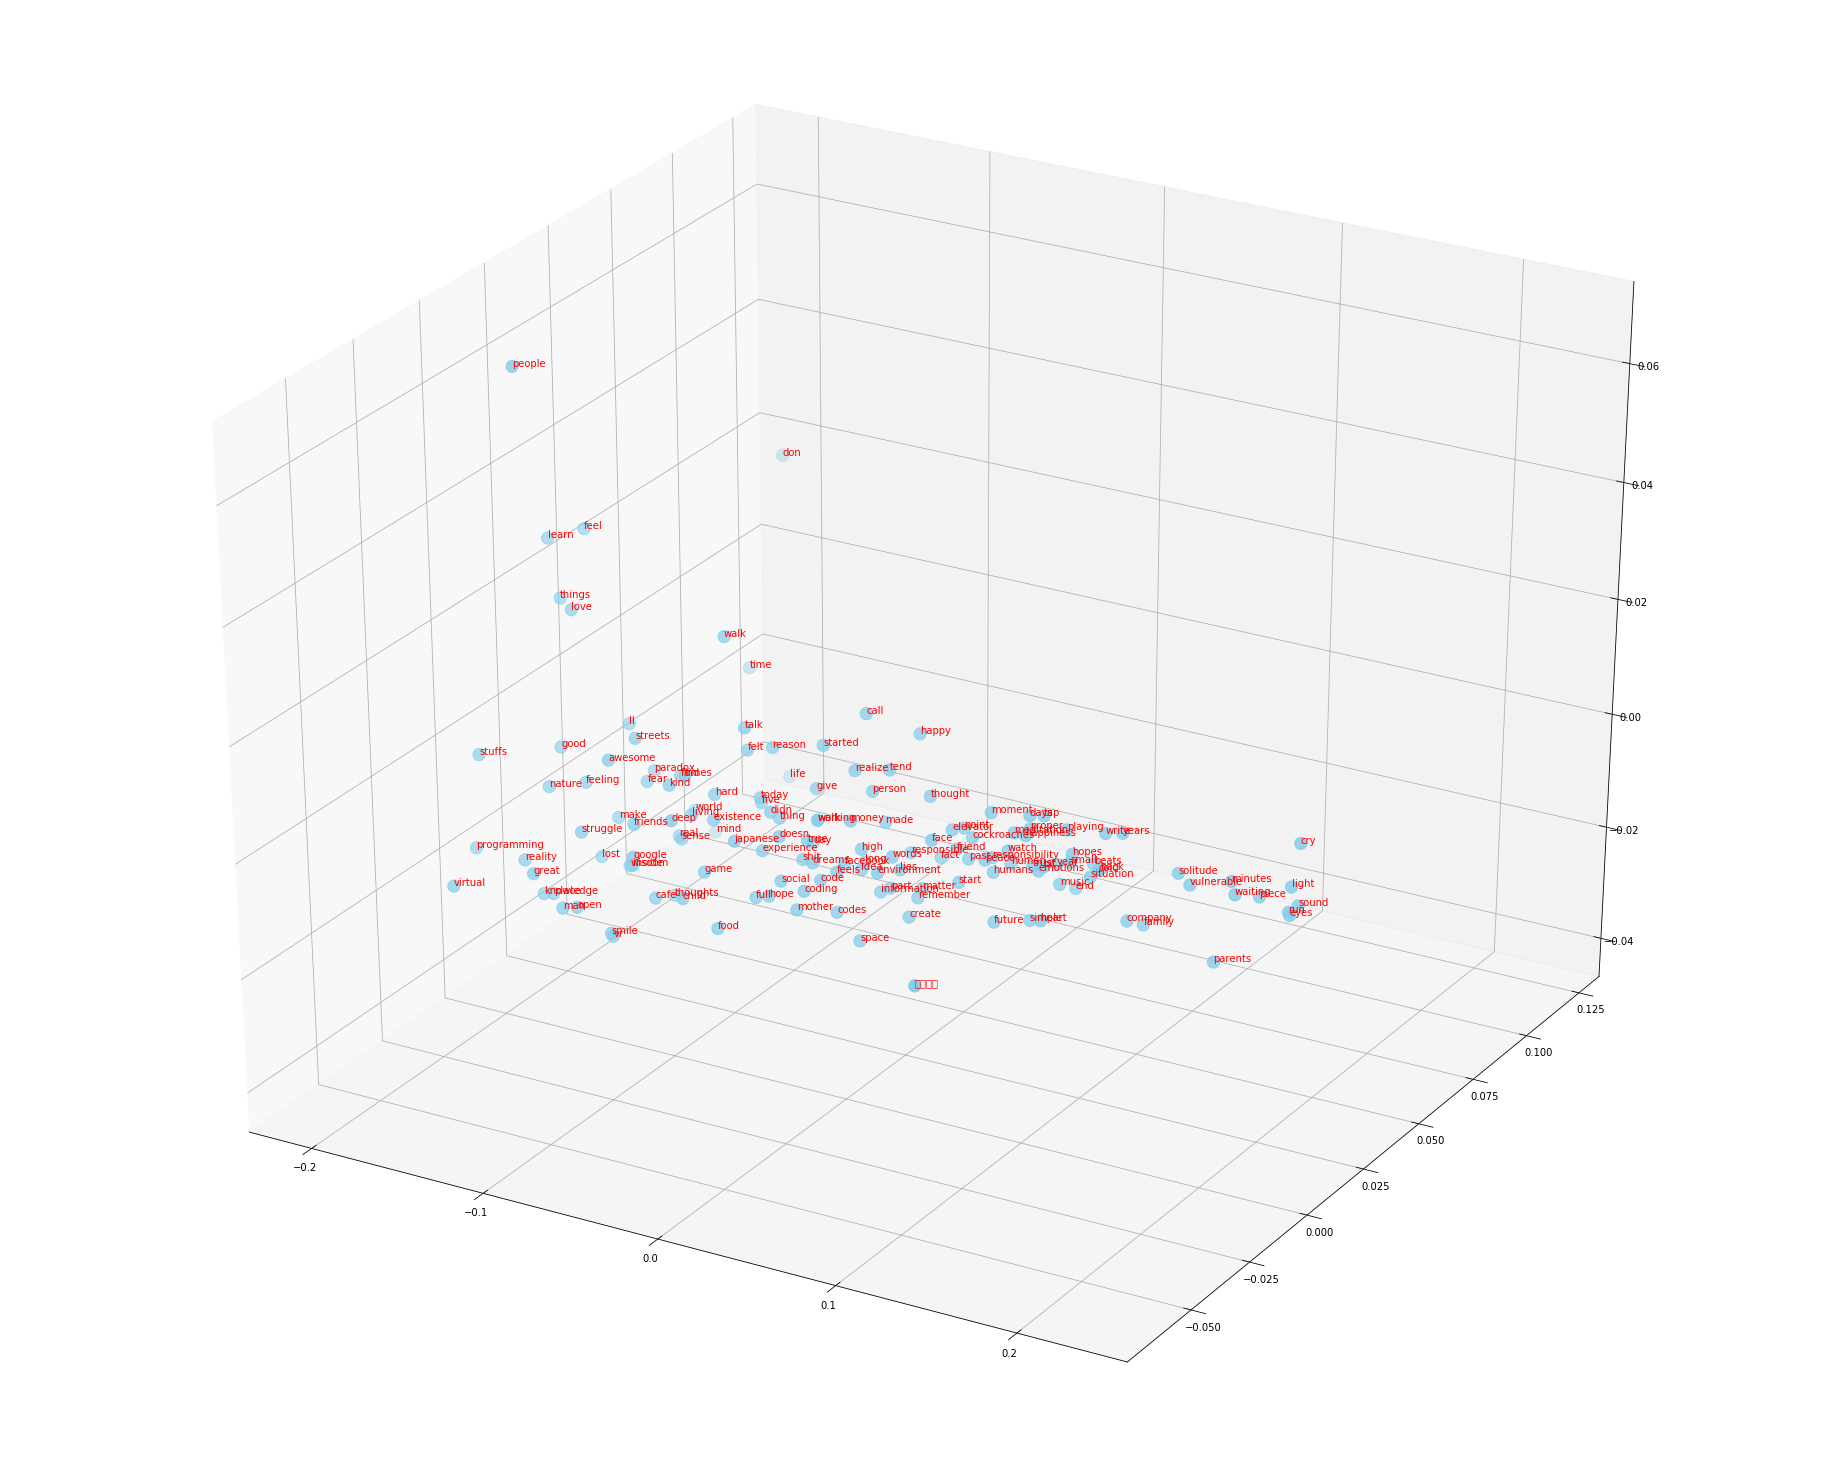

In [327]:
%matplotlib qt
plt.rcParams['figure.figsize'] = 25, 20
# visualize in 3d space
Xp = comp3d[:, 0]
Yp = comp3d[:, 1]
Zp = comp3d[:, 2]

# plot
fig, ax = plt.subplots()
ax = Axes3D(fig)
ax.scatter(Xp, Yp, Zp, c='skyblue', s=150)

for i, txt in enumerate(vocabs_topn):
    #ax.annotate(txt, (X[i],Y[i], Z[i]))
    ax.text(Xp[i], Yp[i], Zp[i], txt, color='red')
plt.show()

In [328]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
snevals = tsne_model.fit_transform(vectors)

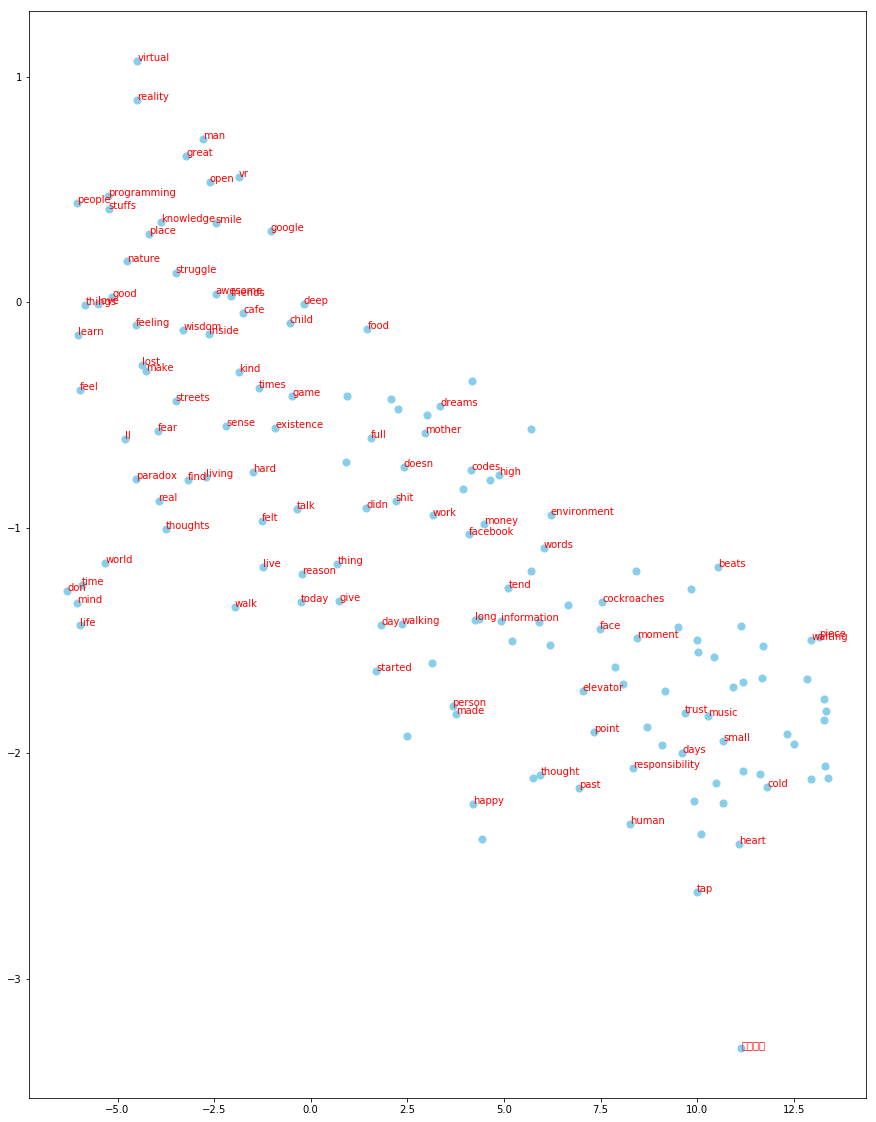

In [332]:
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 20
Xt = snevals[:, 0]
Yt = snevals[:, 1]
#plt.scatter(Xp, Yp)

# plot
fig, ax = plt.subplots()
#ax = Axes3D(fig)
ax.scatter(Xt, Yt, c='skyblue', s=50)

for i in range(0, 100):
    ax.annotate(vocabs_topn[i], (Xt[i],Yt[i]), color='red')